In [1]:
from myst_nb import glue


import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
# import ipywidgets as widgets
from IPython.display import display, display_html
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import markdown
from IPython.core.display import display, HTML

ModuleNotFoundError: No module named 'matplotlib'

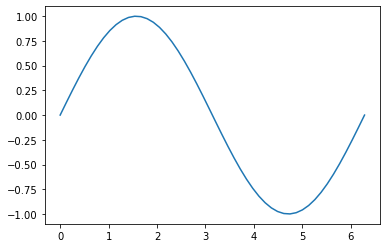

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [2]:
# %matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))
plt.show()

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update, align = 'center')

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import mpl_interactions.ipyplot as iplt

x = np.linspace(0, 2 * np.pi, 1000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

def f(x, w):
    return np.sin(w * x)

controls = iplt.plot(x, f, w=(1, 10))

<IPython.core.display.Javascript object>

In [4]:
from IPython.display import display
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt

def plot_oscillation(wavelength, magnitude, phase):
    x = np.linspace(-20, 20, 1000)
    plt.plot(x, magnitude*np.sin((x+phase)/(wavelength/(2*np.pi))))
    plt.show()
    
w = dict(wavelength = FloatSlider(2*np.pi, min=0.1, max=20, step=0.1, description='wavelength'),
         magnitude = FloatSlider(1, min=0.1, max=10, step=0.1, description='magnitude'),
         phase = FloatSlider(0, min=0, max=10, step=0.1, description='phase'))

output = interactive_output(plot_oscillation, w)
box = HBox([VBox([*w.values()]), output])
display(box)

In [5]:
import numpy as np
from bqplot import pyplot as plt
from IPython.display import display
from ipywidgets import interactive, fixed, IntSlider, HBox, Layout
%matplotlib inline

plt.figure(min_aspect_ratio=1, max_aspect_ratio=1)

xs = np.random.randint(0, 5000 + 1, 100)
ys = np.random.randint(0, 5000 + 1, 100)

scat = plt.scatter(xs, ys)

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

def update_plot(theta, xs, ys):
    new_xs, new_ys = rotate(theta, xs, ys)
    scat.x, scat.y = new_xs, new_ys

w = interactive(update_plot, 
             theta=IntSlider(min=-180, max=180, step=5,value=0, orientation='vertical'), 
             xs=fixed(xs), 
             ys=fixed(ys))

box_layout = Layout(display='flex', flex_flow='row', justify_content='center', align_items='center')
display(HBox([plt.current_figure(), w], layout=box_layout))

In [6]:
from IPython.display import display, clear_output
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

out = Output(layout={'width': '300px', 'height': '300px'})

def update_plot(change): 
    theta = change['new'] # new slider value 
    with out: 
        clear_output(wait=True)
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        scat, = ax.plot(xs, ys, 'kx', markersize=1)
        ax.grid(which='both', color='.25', lw=.1)
        ax.set_aspect('equal'), ax.set_title('Rotate')
        new_xs, new_ys = rotate(theta, xs, ys) 
        scat.set_xdata(new_xs), scat.set_ydata(new_ys)
        ax.set_xlim(new_xs.min() - 500, new_xs.max() + 500)
        ax.set_ylim(new_ys.min() - 500, new_ys.max() + 500)
        plt.show()

xs = np.random.randint(0, 5000, 50) 
ys = np.random.randint(0, 5000, 50) 

slider = IntSlider(min=-180, max=180, step=5, value=0, orientation='vertical') 
slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
display(HBox([out, slider]))

# Test Stuff

In [7]:
my_variable = "here is some text!"
glue("cool_text", my_variable)

'here is some text!'

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
import markdown
from IPython.core.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
df_sample
dfht = df[['Height']]
      
# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std
out1 = Output()
df1 = Output()
df2 = Output()
cap = Output()

with df1:
    display(df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males'))

with df2: 
    display(dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights'))
    
with out1:
    fig, ax = plt.subplots();
    sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
    sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 
    plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
    plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
    plt.xlim(55,80)
    plt.ylim(0,.38)
    plt.legend()
    plt.show()

# with cap:
#     markdown.markdown("""
#         {glue:figure} ht-distfig
#             :name: square-fig1
        
#             newComparing the distributions of the sample (blue) to the population (red) heights.
#         """)
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items = 'center',
                    justify_content = 'center',
                    border='solid',
                    width='100%')

box_images = Box(children = [df1, df2, out1],layout=box_layout)
box_images

Box(children=(Output(), Output(), Output()), layout=Layout(align_items='center', border='solid', display='flex…

In [9]:
# from ipywidgets import interact, FloatSlider, interactive, fixed
# import matplotlib.patches as mpatches
# from bqplot import pyplot as plt
# from matplotlib.collections import PatchCollection

# import numpy as np
# from bqplot import pyplot as plt
# from IPython.display import display
# from ipywidgets import interactive, fixed, IntSlider, FloatSlider, HBox, Layout

# style="Simple,head_length=28,head_width=36,tail_width=20"
# arrow = arrow = mpatches.FancyArrowPatch((1,1), (3,3), arrowstyle=style)
# plt.gca().add_patch(arrow)

# plt.plot([1, 3], [1,3], "rx", markersize=15)
# plt.xlim(0, 6)
# plt.ylim(0, 6)
# plt.show()

from ipywidgets import interact, FloatSlider, interactive, fixed
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

#imports
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
# import ipywidgets as widgets
from IPython.display import display, display_html
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import markdown
from IPython.core.display import display, HTML
from myst_nb import glue

out = Output()

mu = 66.4
sigma = 3.84
sample_size = 50,
upper_cond= 66.4+4*3.84

#draws pdf of smampling means)
def update_plot(change):
    lower_cond = change['new'] # new slider value 
    mu = 66.4
    sigma = 3.84
    sample_size = 50.0,
    upper_cond= 66.4+4*3.84
    sigma_n = sigma/(np.sqrt(sample_size)[0]) #std dev of sampling means
    with out:
#         sigma_n = sigma #std dev of sampling means
        clear_output(wait=True)
        x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000) #x-axis values
        y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) #norm function
        #plot
        fig, axs = plt.subplots()
        plt.plot(x, y)
        plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'pink')
        plt.axvline(x=66.4, color='red', dashes=(3, 3), zorder=0,linewidth=1)
        plt.axvline(x=lower_cond, color='blue', dashes=(3, 3), zorder=0,linewidth=1)
        plt.xlabel('Density')
        plt.ylabel('Height')
        plt.text(lower_cond+.1,.6, r'$\bar{}=${}'.format(r'x',round(lower_cond,2)), fontsize=12)
        prob = 1-norm.cdf(lower_cond, loc=mu, scale=sigma_n)
        plt.text(67.5,.3, r'prob.={}'.format(round(prob,3)), fontsize=12)
        ##arrows
        style="Simple,head_length=15,head_width=15,tail_width=3"
        arrow = arrow = mpatches.FancyArrowPatch((68,.275), ((lower_cond+68)/2,
                                                 norm.pdf((lower_cond+68.75)/2, mu, sigma_n)/2),
                                                 arrowstyle=style)
        plt.gca().add_patch(arrow)
    #     display(fig)
        plt.show()


style ={'description_width': 'initial'};

interact_layout = Layout(display='flex',
#                     flex_flow='column', #default for VBox
                    align_items = 'center',
#                     align_content = 'center',
                    justify_content = 'center',
#                     border = 'solid', #centers widget
                    )

# slider_layout = Layout(
#     border='solid',
#     justify_content = 'center',
#     align_items = 'center',
#     align_content = 'center',
# )

slider = FloatSlider(description='Sample mean', 
                                style = style,
                                min=64.5, max=68.5, 
                                step = .5, value=67,
#                                 layout = slider_layout
                                )

# box_images = VBox(children = [w.children[0], w.children[1]],layout=box_layout)
# box_images
# display(w.children[0],justify_content = 'center')
# display(w.children[1],justify_content = 'center')
# display(w)
slider_box = Box([slider] , layout = interact_layout) 

fig_box = Box([out] , layout = interact_layout) 


slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
fig_and_slider = VBox(children = [slider_box, fig_box], layout=interact_layout)
display(fig_and_slider)
# display(VBox([w.children[0], w.children[1]]))

# display(VBox([plt.current_figure(), w]))

In [10]:
from IPython.display import display, clear_output
import ipywidgets as ipy
import matplotlib.pyplot as plt
import numpy as np

# setup figure
n = 10

out = ipy.Output()

# show random mesh
def update(idx):
    with out:
        clear_output()
        fig, ax = plt.subplots(figsize = (5,5))
        h = ax.imshow(np.random.rand(n, n))
        h.set_data(np.random.rand(n, n))
        fig.canvas.flush_events()
        fig.canvas.draw()
        plt.show()

slider = ipy.IntSlider(min = 0, max = 10)
widget = ipy.interactive(update, idx = slider)

layout = ipy.Layout(
#     display = 'flex',
#                    flex_flow = 'row',
#                    justify_content = 'space-between',
#                    align_items = 'center',
#                      justify_content = 'center'
                   )
widgets = ipy.VBox(children=(slider, out), layout = layout)
display(widgets)

In [11]:
# import numpy as np
# from bqplot import pyplot as plt
# from IPython.display import display
# from ipywidgets import interactive, fixed, IntSlider, HBox, Layout, Box

# plt.figure(min_aspect_ratio=1, max_aspect_ratio=1)

# xs = np.random.randint(0, 5000 + 1, 100)
# ys = np.random.randint(0, 5000 + 1, 100)

# scat = plt.scatter(xs, ys)

# def rotate(theta, xs, ys):
#     new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
#     new_xs -= new_xs.min()
#     new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
#     new_ys -= new_ys.min()
#     return new_xs, new_ys

# def update_plot(theta, xs, ys):
#     new_xs, new_ys = rotate(theta, xs, ys)
#     scat.x, scat.y = new_xs, new_ys

# w = interactive(update_plot, 
#              theta=IntSlider(min=-180, max=180, step=5,value=0, orientation='vertical'), 
#              xs=fixed(xs), 
#              ys=fixed(ys))

# box_layout = Layout(display='flex', justify_content='center', align_items='center')
# display(HBox([plt.current_figure(), w], layout=box_layout))

In [12]:
from IPython.display import display, clear_output
from ipywidgets import interact, fixed, IntSlider, HBox, Layout, Output, VBox
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def rotate(theta, xs, ys):
    new_xs = xs * np.cos(np.deg2rad(theta)) - ys * np.sin(np.deg2rad(theta))
    new_xs -= new_xs.min()
    new_ys = xs * np.sin(np.deg2rad(theta)) + ys * np.cos(np.deg2rad(theta))
    new_ys -= new_ys.min()
    return new_xs, new_ys

out = Output(layout={'width': '300px', 'height': '300px'})

def update_plot(change): 
    theta = change['new'] # new slider value 
    with out: 
        clear_output(wait=True)
        fig = plt.figure(figsize=(4,4))
        ax = fig.add_subplot(111)
        scat, = ax.plot(xs, ys, 'kx', markersize=1)
        ax.grid(which='both', color='.25', lw=.1)
        ax.set_aspect('equal'), ax.set_title('Rotate')
        new_xs, new_ys = rotate(theta, xs, ys) 
        scat.set_xdata(new_xs), scat.set_ydata(new_ys)
        ax.set_xlim(new_xs.min() - 500, new_xs.max() + 500)
        ax.set_ylim(new_ys.min() - 500, new_ys.max() + 500)
        plt.show()

xs = np.random.randint(0, 5000, 50) 
ys = np.random.randint(0, 5000, 50) 

slider = IntSlider(min=-180, max=180, step=5, value=0, orientation='vertical') 
slider.observe(update_plot, 'value')
update_plot({'new': slider.value}) 
display(HBox([out, slider]))

In [13]:
# %matplotlib notebook
%matplotlib inline

from ipywidgets import interact, FloatSlider, interactive, fixed
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

# style="Simple,head_length=28,head_width=36,tail_width=20"
# arrow = arrow = mpatches.FancyArrowPatch((1,1), (3,3), arrowstyle=style)
# plt.gca().add_patch(arrow)

# plt.plot([1, 3], [1,3], "rx", markersize=15)
# plt.xlim(0, 6)
# plt.ylim(0, 6)
# plt.show()

#draws pdf of smampling means)
def draw_pdf_smeans(mu, sigma, sample_size, lower_cond, upper_cond):
    sigma_n = sigma/(math.sqrt(sample_size)) #std dev of sampling means
    x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000) #x-axis values
    y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) #norm function
    #plot
    fig, axs = plt.subplots()
    plt.plot(x, y)
    plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'pink')
    plt.axvline(x=66.4, color='red', dashes=(3, 3), zorder=0,linewidth=1)
    plt.axvline(x=lower_cond, color='blue', dashes=(3, 3), zorder=0,linewidth=1)
    plt.xlabel('Density')
    plt.ylabel('Height')
    plt.text(lower_cond+.1,.6, r'$\bar{}=${}'.format(r'x',round(lower_cond,2)), fontsize=12)
    prob = 1-norm.cdf(lower_cond, loc=mu, scale=sigma_n)
    plt.text(67.5,.3, r'prob.={}'.format(round(prob,3)), fontsize=12)
    ##arrows
    style="Simple,head_length=15,head_width=15,tail_width=3"
    arrow = arrow = mpatches.FancyArrowPatch((68,.275), ((lower_cond+68)/2,
                                             norm.pdf((lower_cond+68.75)/2, mu, sigma_n)/2),
                                             arrowstyle=style)
    plt.gca().add_patch(arrow)
    plt.show()
    
## Generate our user interface.
# slider = widgets.FloatSlider(description='Sample mean', 
#                                 style = style, 
#                                 min=64.5, max=68.5, 
#                                 step = 0.1, value=67)

style ={'description_width': 'initial'};
interact_layout = Layout(display='flex',
                    align = 'center',
                    border='solid'
                    )

interactive(draw_pdf_smeans,
         mu = fixed(66.4),
         sigma = fixed(3.84),
         sample_size = fixed(50),
         upper_cond= fixed(66.4+4*3.84),
         lower_cond=FloatSlider(description='Sample mean', 
                                style = style, 
                                min=64.5, max=68.5, 
                                step = 0.1, value=67
                                ),
        );

# display(VBox([w.children[0],w.children[1]]))
#https://stackoverflow.com/questions/45464424/how-to-change-the-default-position-of-a-ipywidget-slider-to-the-side-of-a-matplo
# display(VBox([w.children[0],w.children[1]]))
              

In [14]:
# Simulate some data and bootstrap the mean of the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))

In [15]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])

# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

2.9998712948836377

2.987185818843306

3.012286299119277

In [16]:
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
import markdown
from IPython.core.display import display, HTML

%matplotlib inline

fig1 = Output()
cap = Output()

with fig1:
    fig, ax = plt.subplots()
    ax.hist(means)
    for ln in [clo, chi]:
        ax.axvline(ln, ls='--', c='r')
    ax.set_title("Bootstrap distribution and 95% CI")
    plt.show()

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items = 'center',
                    justify_content = 'center',
                    border='solid',
                    width='100%')

box_images = Box(children = [fig1,fig1],layout=box_layout)
box_images

Box(children=(Output(), Output()), layout=Layout(align_items='center', border='solid', display='flex', flex_fl…

```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: caption-hack
:name: your-fig-name

Your caption goes here fox box
```

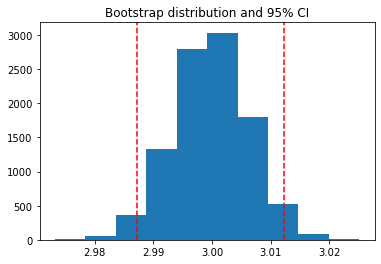

In [17]:
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)

fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
plt.show()

```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: caption-hack
:name: your-fig-name2

caption fo image Your caption goes here
```